# One-Class SVM - Anomaly Detection


- One-class SVM (Support Vector Machine) is a specialised form of the standard SVM tailored for unsupervised learning tasks, particularly anomaly detection.
- Unlike traditional SVMs, which are used for classification and regression tasks involving multiple classes, One-Class SVM focuses on identifying whether a given data point belongs to a particular class or is an outlier.
- One-Class SVM is **designed to distinguish between normal and abnormal data** points in a dataset.
- It does this by **learning a decision boundary encompassing most data points considered normal**.
- Any point that lies outside this boundary is classified as an anomaly.
-  This makes One-Class SVM an invaluable tool in scenarios where the goal is to detect unusual patterns or rare events that deviate significantly from the norm.



# One-Class SVM Process

At its core, One-Class SVM works by **constructing a hyperplane that maximises the margin around the data points in the feature space**. The algorithm **tries to find the smallest region that can encapsulate most data points (regular instances) while considering a certain fraction of the data as outliers**.

Here’s a simplified explanation of the process:

**1.Training Phase:** During training, the One-Class SVM algorithm takes in a dataset primarily consisting of normal data points. The model then **identifies a decision boundary encompassing these feature space points**. This boundary is shaped by the support vectors, the critical data points lying closest to the boundary.
**2.Decision Function:** The decision function determines **whether a new data point falls within the normal region (inside the boundary) or outside (anomalous)**.

**Mathematically, the decision function can be expressed as: f(x)=w⋅ϕ(x)−ρ**

Where
- w is the weight vector,
- ϕ(x) is the feature mapping of the input x,
- ρ is the offset.

If f(x) is greater than zero, the point x is considered normal; otherwise, it is an anomaly.


# SVM Vs One-Class SVM

**Traditional SVMs** are used for binary or multi-class classification by finding the optimal hyperplane that separates different classes, **One-Class SVM** takes a different approach.

Instead of distinguishing between multiple classes, **One-Class SVM focuses solely on identifying a single class and detecting any deviations from this class**. This makes it particularly effective for applications where the primary goal is to detect outliers or anomalies within a data set.

**Example:**
Consider a cybersecurity application that aims to detect unusual network traffic that might indicate a security breach. One-class SVM can be trained on normal network traffic data in this case. Once trained, it can monitor new traffic and flag any patterns significantly different from normal traffic as potential threats.

One-Class SVM is a powerful tool for anomaly detection, capable of identifying rare and unusual events in a wide range of applications. Learning the normal patterns in data provides a robust mechanism to detect deviations that could indicate anomalies, making it an essential technique in the toolkit of data scientists and engineers.



# Applications of One-Class SVM


1. Anomaly Detection with One-Class SVM
  - Cybersecurity - To detect unusual patterns in network traffic that may indicate a security breach or an intrusion.
  - Finance - to detect fraudulent transactions
  - Healthcare - analyse medical records to identify anomalies that may signify potential health issues

2. Outlier Detection with One-Class SVM
  - Data Cleaning - To identify and remove outliers
  - Environmental Monitoring - To detect unusual temperature readings or sudden changes in pollution levels, which could indicate faulty sensors or significant environmental events.

3. Novelty Detection with One-Class SVM - involves identifying new or previously unseen data points during the model’s deployment phase
  - Manufacturing - to monitor the production process to detect new defects or faults that were not present during the training phase
  - Robotics - to detect novel situations or changes in the environment that were not encountered during training

# Advantages

- Effectiveness in High-Dimensional Spaces: valuable tool for complex datasets, such as those encountered in text and image processing.

- Flexibility with Non-Linear Data: handle non-linear relationships within the data by leveraging the kernel trick. This flexibility allows it to create complex decision boundaries that can effectively encapsulate normal data points, making it highly adaptable to various data distributions.

- Robustness to Outliers - to be robust to a certain number of outliers. The parameter ν controls the proportion of outliers the model can tolerate, ensuring that the decision boundary is not unduly influenced by noise or anomalous data points in the training set.

- Scalability - scaled to large datasets. While the training complexity depends on the number of support vectors, which can grow with the dataset’s size, efficient implementations and the use of kernels can help manage computational demands.

- Unsupervised Learning: not require labelled data for training

# Limitations

- Parameter Sensitivity: choice of parameters, such as the kernel type and its parameters (e.g., γ for the RBF kernel) and the 𝜈 parameter. Finding the optimal parameters typically requires extensive experimentation and cross-validation, which can be time-consuming.

- Computational Complexity: training time can be significant, especially for large datasets with many support vectors

- Scalability Issues with Very Large Datasets: The memory and processing requirements can become prohibitive, necessitating approximate or distributed methods to manage the scale

- Interpretability: can be challenging to interpret, mainly when using non-linear kernels.

- Assumption of Homogeneity: one-class SVM assumes that most training data represent a single class (normal behaviour). However, the model’s performance can degrade in cases where the training data is heterogeneous or contains significant variations within the regular class.

- Imbalanced Data Handling: is primarily designed to learn from a predominantly normal dataset. If the dataset contains many anomalies, the model might struggle to accurately delineate the normal and anomalous regions.


In [16]:
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # Import matplotlib for visualization
from sklearn.metrics import classification_report

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Use all features initially
feature_names = iris.feature_names

In [3]:
# For simplicity and potential visualization, let's use only two features:
# Sepal length (index 0) and Sepal width (index 1)
X_subset = X[:, [0, 1]]
selected_feature_names = [feature_names[0], feature_names[1]]

In [4]:
X_subset

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [5]:
selected_feature_names

['sepal length (cm)', 'sepal width (cm)']

In [7]:
print(f"Using features: {selected_feature_names}")
print("Subset data shape:", X_subset.shape)

Using features: ['sepal length (cm)', 'sepal width (cm)']
Subset data shape: (150, 2)


In [8]:

# Scale the data - important for SVMs
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_subset)

In [17]:
# Initialize the One-Class SVM model
# nu: An estimate of the fraction of outliers. Adjust this based on your data.
# kernel: 'rbf' is commonly used for its flexibility.
model = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.1)

In [18]:
# Train the model on the scaled data
# One-Class SVM is unsupervised, it learns the boundary of the 'normal' data
model.fit(X_scaled)

OneClassSVM(gamma=0.1, nu=0.1)

In [19]:
# Predict anomalies (-1 for outliers, 1 for inliers)
predictions = model.predict(X_scaled)

In [24]:
# --- Classification Report (using predictions as pseudo-labels) ---
# Map predictions to class names for the report
# Note: This report treats the model's predictions as ground truth,
# which is not a standard evaluation for unsupervised anomaly detection
# but can show the distribution of predicted classes.
target_names = ['anomaly', 'normal']
# Map -1 to 0 (anomaly) and 1 to 1 (normal) for report indexing
y_true_pseudo = np.where(predictions == 1, 1, 0)
y_pred_pseudo = np.where(predictions == 1, 1, 0) # predictions are used as both true and predicted for this report

print("\n--- Classification Report (based on model predictions) ---")
print(classification_report(y_true_pseudo, y_pred_pseudo, target_names=target_names))


--- Classification Report (based on model predictions) ---
              precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00        17
      normal       1.00      1.00      1.00       133

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [20]:
# Separate inliers and outliers based on predictions
inliers = X_subset[predictions == 1]
outliers = X_subset[predictions == -1]

In [22]:
inliers

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [5.8, 4. ],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9, 3.1],
       [5.5, 2.3],
       [6.5, 2.8],
       [5.7, 2.8],
       [6.3, 3.3],
       [4.9, 2.4],
       [6.6, 2.9],
       [5.2,

In [21]:
print("\n--- Results ---")
print("Total samples:", X_subset.shape[0])
print("Number of inliers:", inliers.shape[0])
print("Number of outliers:", outliers.shape[0])


--- Results ---
Total samples: 150
Number of inliers: 133
Number of outliers: 17


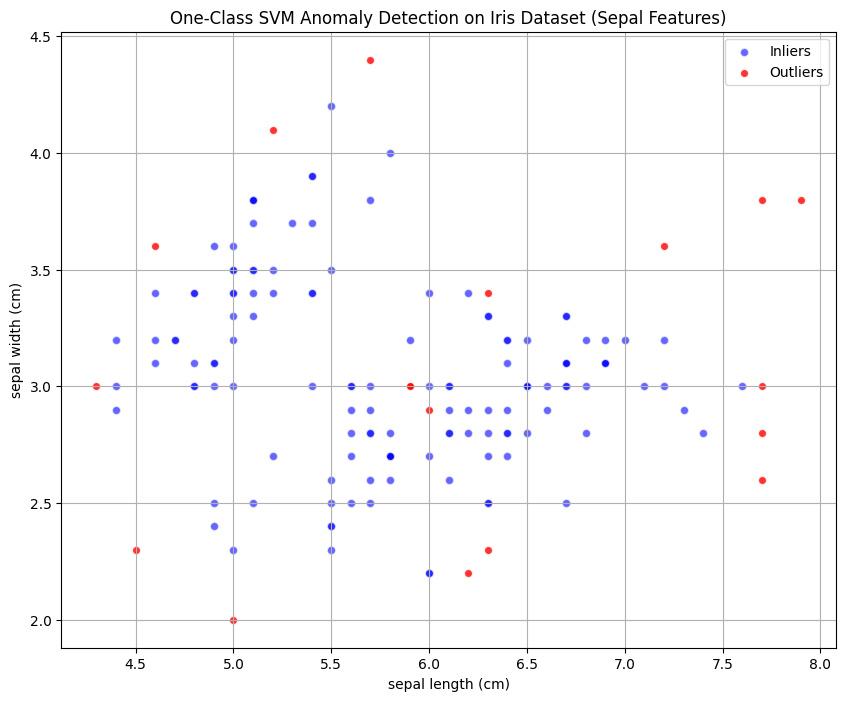

In [15]:
plt.figure(figsize=(10, 8))
plt.scatter(inliers[:, 0], inliers[:, 1], label='Inliers', c='blue', alpha=0.6, edgecolors='w')
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Outliers', alpha=0.8, edgecolors='w')
plt.title('One-Class SVM Anomaly Detection on Iris Dataset (Sepal Features)')
plt.xlabel(selected_feature_names[0])
plt.ylabel(selected_feature_names[1])
plt.legend()
plt.grid(True)
plt.show()

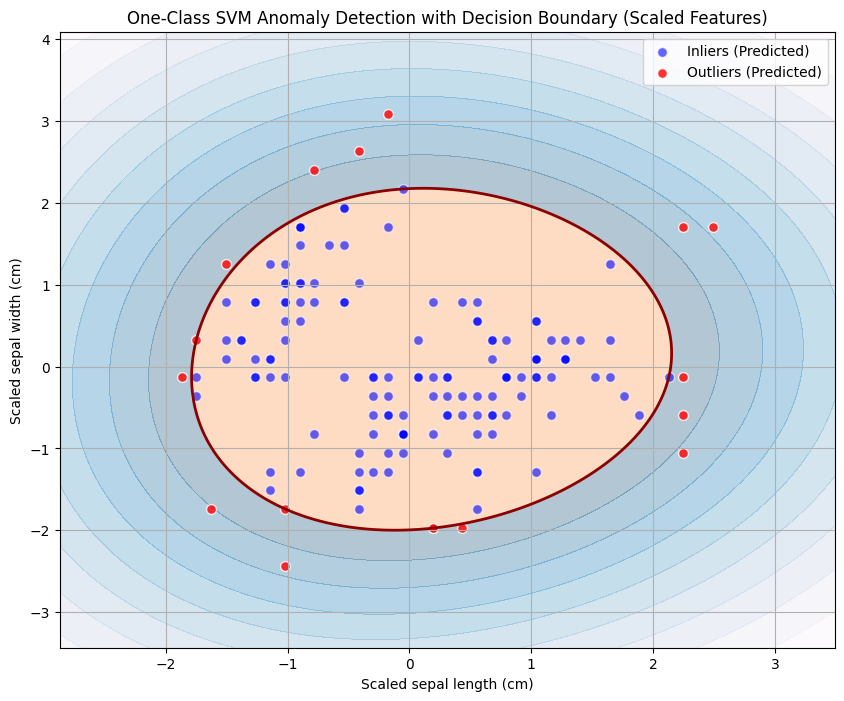

In [23]:
plt.figure(figsize=(10, 8))

# Plot the decision boundary
# Create a meshgrid to plot the decision function
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Evaluate the decision function on the meshgrid
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour of the decision function, highlighting the boundary (Z=0)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 10), cmap=plt.cm.PuBu, alpha=0.3)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], cmap=plt.cm.YlOrRd, alpha=0.3)

# Plot the data points (using original, unscaled data for clarity on axes)
# We need to use the scaled data for the decision function evaluation,
# but plotting the original data makes the axes interpretable in terms of the original features.
# However, for consistency with the decision boundary plotted on scaled space,
# it's better to plot the scaled data points. Let's use scaled data for plotting.
plt.scatter(X_scaled[predictions == 1, 0], X_scaled[predictions == 1, 1], label='Inliers (Predicted)', c='blue', alpha=0.6, edgecolors='w', s=50)
plt.scatter(X_scaled[predictions == -1, 0], X_scaled[predictions == -1, 1], color='red', label='Outliers (Predicted)', alpha=0.8, edgecolors='w', s=50)


plt.title('One-Class SVM Anomaly Detection with Decision Boundary (Scaled Features)')
plt.xlabel(f'Scaled {selected_feature_names[0]}')
plt.ylabel(f'Scaled {selected_feature_names[1]}')
plt.legend()
plt.grid(True)
plt.show()

# Source

- https://spotintelligence.com/2024/05/27/anomaly-detection-one-class-svm/